In [ ]:
import pandas as pd
import numpy as np
from pyscarcopula.utils import pobs
from pyscarcopula import (GumbelCopula, FrankCopula, JoeCopula, ClaytonCopula,
                          BivariateGaussianCopula, GaussianCopula, StudentCopula,
                          CVineCopula)
from pyscarcopula.stattests import gof_test

In [2]:
#read data

crypto_prices = pd.read_csv("data/crypto_prices.csv", index_col=0, sep = ';')

tickers = ['BTC-USD', 'ETH-USD']

returns_pd = np.log(crypto_prices[tickers] / crypto_prices[tickers].shift(1))[1:]
returns = returns_pd.values
u = pobs(returns)

In [3]:
#initialize copula object

copula_mle = GumbelCopula(rotate=180)
copula_tm = GumbelCopula(rotate=180)

In [4]:
# consider bivariate case for copula fit.
# basic mle fit 
# goodness of fit for Archimedian copula

fit_result_mle = copula_mle.fit(data = returns, method = 'mle', to_pobs=True)
gof_result_mle = gof_test(copula_mle, returns, to_pobs=True)

print(f"MLE:")
print(f"log_likelihood = {fit_result_mle.log_likelihood:.4f}, copula paramter = {fit_result_mle.copula_param:.4f}")
print(f"GoF statistic={gof_result_mle.statistic:.4f}, p-value={gof_result_mle.pvalue:.4f}")


MLE:
log_likelihood = 955.6275, copula paramter = 2.8318
GoF statistic=0.7536, p-value=0.0094


In [5]:
# stochastic model. Compare results

fit_result_tm = copula_tm.fit(data = returns, method = 'scar-tm-ou', to_pobs=True)
gof_result_tm = gof_test(copula_tm, returns, to_pobs=True)

print(f"Stochastic model via Trasfer matrix:")
print(f"log_likelihood = {fit_result_tm.log_likelihood:.4f}, copula paramter = {fit_result_tm.alpha}")
print(f"GoF statistic={gof_result_tm.statistic:.4f}, p-value={gof_result_tm.pvalue:.4f}")

Stochastic model via Trasfer matrix:
log_likelihood = 1045.4997, copula paramter = [58.99857924  1.48765678  4.53265176]
GoF statistic=0.0718, p-value=0.7404


In [6]:
#sampling from copula with constant parameter

copula_mle.sample(n = 1000, r = 1.1)

array([[0.18625387, 0.27703666],
       [0.85172892, 0.21053395],
       [0.05772358, 0.07558419],
       ...,
       [0.54001429, 0.168533  ],
       [0.33618954, 0.12757151],
       [0.48530215, 0.67326051]])

In [7]:
#sampling next state from stochastic copula

copula_tm.predict(n = 1000)

array([[0.93356473, 0.91245093],
       [0.78779503, 0.72407781],
       [0.88536087, 0.89523427],
       ...,
       [0.25950301, 0.28341717],
       [0.85085084, 0.78654239],
       [0.08954891, 0.07776675]])

In [8]:
#consider multivariate case

tickers = ['BTC-USD', 'ETH-USD', 'BNB-USD', 'ADA-USD', 'XRP-USD', 'DOGE-USD']

returns_pd = np.log(crypto_prices[tickers] / crypto_prices[tickers].shift(1))[1:251]
returns = returns_pd.values
u = pobs(returns)

In [ ]:
# Automatic selection
vine = CVineCopula()
vine.fit(u, method='scar-tm-ou')
vine.summary()

ll = vine.log_likelihood(u)
samples = vine.sample(1000, u_train=u)  # for SCAR
predictions = vine.predict(1000)

C-Vine Copula (d=6, method=SCAR-TM-OU)

Tree 0:
  Edge 0: Gumbel copula rot=180, alpha=[19.1375878   1.52812117  2.1331323 ], logL=192.57
  Edge 1: Gumbel copula rot=180, alpha=[2.58610232e+00 1.22911655e+00 1.00000000e-03], logL=136.53
  Edge 2: Gumbel copula rot=180, alpha=[19.82606475  1.26402449  2.23027302], logL=138.10
  Edge 3: Gumbel copula rot=180, alpha=[4.66208700e+00 1.29279217e+00 1.00000000e-03], logL=148.08
  Edge 4: Gumbel copula rot=180, alpha=[25.12775389  1.22190817  3.05739892], logL=120.75

Tree 1:
  Edge 0: Gumbel copula rot=180, alpha=[1.77230651e+00 6.88712050e-01 1.00000000e-03], logL=40.25
  Edge 1: Gumbel copula rot=180, alpha=[1.07126758e+01 4.29839788e-03 3.50952447e+00], logL=34.88
  Edge 2: Gumbel copula rot=180, alpha=[2.51096786 0.77218311 0.3358116 ], logL=54.09
  Edge 3: Gaussian copula, alpha=[1.89435825e+00 1.04134669e+00 1.00000000e-03], logL=10.58

Tree 2:
  Edge 0: Gumbel copula rot=180, alpha=[ 1.50041084e+01 -1.34676675e-03  2.62310070e+00], lo

In [10]:
copula_s = StudentCopula()
copula_g = GaussianCopula()

copula_s.fit(u)
copula_g.fit(u)

gof_result_s = gof_test(copula_s, u, to_pobs=False)
gof_result_g = gof_test(copula_g, u, to_pobs=False)
gof_result_vine = gof_test(vine, u, to_pobs=False)

print('Stochastic C-vine')
print(f"log_likelihood = {vine.log_likelihood(u)}")
print(f"statistic={gof_result_vine.statistic:.4f}, p-value={gof_result_vine.pvalue:.4f}\n")

print('Student')
print(f"log_likelihood = {copula_s.log_likelihood(u)}")
print(f"statistic={gof_result_s.statistic:.4f}, p-value={gof_result_s.pvalue:.4f}\n")

print('Gaussian')
print(f"log_likelihood = {copula_g.log_likelihood(u)}")
print(f"statistic={gof_result_g.statistic:.4f}, p-value={gof_result_g.pvalue:.4f}")

Stochastic C-vine
log_likelihood = 890.299064222026
statistic=0.0686, p-value=0.7609

Student
log_likelihood = 764.4232783937387
statistic=1.5673, p-value=0.0001

Gaussian
log_likelihood = 761.0026811425082
statistic=2.5324, p-value=0.0000


In [26]:
from pyscarcopula.metrics import risk_metrics

gamma = [0.95]
window_len = 100
MC_iterations = [int(10**5)]

method = 'mle'
marginals_method = 'johnsonsu'


d = len(tickers)
eq_weight = np.ones(d) / d

result = risk_metrics(vine,
                      returns,
                      window_len,
                      gamma,
                      MC_iterations,
                      marginals_method = marginals_method,
                      method = method,
                      optimize_portfolio = False,
                      portfolio_weight = eq_weight,
                      )

Fitting marginals (johnsonsu)...
gamma=0.95, N_mc=100000, method=mle


100%|██████████| 151/151 [11:47<00:00,  4.68s/it]


In [27]:
var = result[0.95][100000]['var']
cvar = result[0.95][100000]['cvar']
portfolio_weight = result[0.95][100000]['weight']

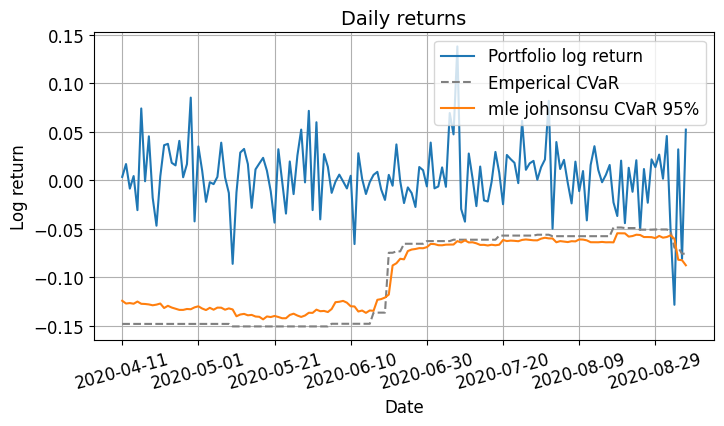

In [34]:
from pyscarcopula.metrics import cvar_emp_window
from matplotlib import pyplot as plt
import matplotlib.ticker as plticker

pd_var_95 = pd.Series(data = -result[gamma[0]][MC_iterations[0]]['var'], index=returns_pd.index).shift(1)
pd_cvar_95 = pd.Series(data = -result[gamma[0]][MC_iterations[0]]['cvar'], index=returns_pd.index).shift(1)

weight = result[gamma[0]][MC_iterations[0]]['weight']

if weight.ndim == 2:
    eqw = np.ones(d) / d
    for k in range(0, window_len - 1):
        weight[k] = eqw

n = 1
m = 1
i1 = window_len
i2 = len(returns) - 1

fig,ax = plt.subplots(n,m,figsize=(8,4))
loc = plticker.MultipleLocator(base=20.0)

daily_returns = ((np.exp(returns_pd) - 1) * weight).sum(axis=1)
cvar_emp = cvar_emp_window(daily_returns.values, 1 - gamma[0], window_len)

ax.plot(np.clip(daily_returns, -0.2, 0.2)[i1:i2], label = 'Portfolio log return')
ax.plot(cvar_emp[i1:i2], label = 'Emperical CVaR', linestyle='dashed', color = 'gray')

ax.plot(pd_cvar_95[i1:i2], label= f'{method} {marginals_method} CVaR 95%')

ax.set_title(f'Daily returns', fontsize = 14)

ax.xaxis.set_major_locator(loc)
ax.set_xlabel('Date', fontsize = 12, loc = 'center')
ax.set_ylabel('Log return', fontsize = 12, loc = 'center')
ax.tick_params(axis='x', labelrotation = 15, labelsize = 12)
ax.tick_params(axis='y', labelsize = 12)
ax.grid(True)
ax.legend(fontsize=12, loc = 'upper right')